<h1 style = "color:Blue; text-align:center;">Association Rules</h1>
<h2 style = "color:Blue; text-align:center;">Using</h2>

<h1 style = "color:Blue; text-align:center;">Apriori Algorithm</h1>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations


df = pd.read_csv(r'StudentsAnswers.csv')
df

,question_id,difficulty_level,category,student_id,student_names,answer,correct_answer,is_correct
0,0,0.37,History,0,Denise Smith,D,A,False
1,1,0.95,Arabic,0,Denise Smith,A,A,True
2,2,0.73,History,0,Denise Smith,C,C,True
3,3,0.60,Math,0,Denise Smith,D,B,False
4,4,0.16,Arabic,0,Denise Smith,D,B,False
...,...,...,...,...,...,...,...,...
99995,95,0.49,Arabic,999,Stephen Russo,C,D,False
99996,96,0.52,Science,999,Stephen Russo,D,D,True
99997,97,0.43,History,999,Stephen Russo,B,B,True
99998,98,0.03,Math,999,Stephen Russo,D,D,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   question_id       100000 non-null  int64  
 1   difficulty_level  100000 non-null  float64
 2   category          100000 non-null  object 
 3   student_id        100000 non-null  int64  
 4   student_names     100000 non-null  object 
 5   answer            100000 non-null  object 
 6   correct_answer    100000 non-null  object 
 7   is_correct        100000 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.4+ MB


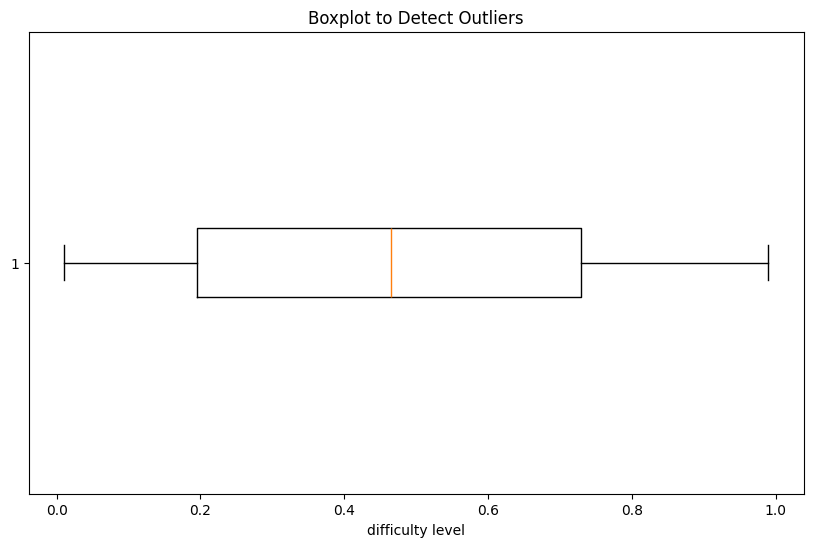

,question_id,difficulty_level,category,student_id,student_names,answer,correct_answer,is_correct


In [4]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['difficulty_level'].quantile(0.25)
Q3 = df['difficulty_level'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['difficulty_level'] < lower_bound) | (df['difficulty_level'] > upper_bound)]

# Plot the data and the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['difficulty_level'], vert=False)
plt.title('Boxplot to Detect Outliers')
plt.xlabel('difficulty level')

# Show the plot
plt.show()

outliers

In [6]:
# Calculate the overall accuracy rate
overall_accuracy = df['is_correct'].mean()
print(f"Overall Accuracy Rate: {overall_accuracy * 100:.2f}%")

# Distribution of scores across students
student_scores = df.groupby('student_id')['is_correct'].mean() * 100
student_scores.head()
student_scores.max()

Overall Accuracy Rate: 49.98%


65.0

In [7]:
student_scores

student_id
0      34.0
1      41.0
2      60.0
3      55.0
4      54.0
       ... 
995    52.0
996    51.0
997    51.0
998    47.0
999    52.0
Name: is_correct, Length: 1000, dtype: float64

In [8]:
max_student_id = student_scores.idxmax()
max_student_score = student_scores.max()
max_student = df[df['student_id'] == max_student_id]
max_student

,question_id,difficulty_level,category,student_id,student_names,answer,correct_answer,is_correct
26000,0,0.37,History,260,Anthony Hernandez,C,A,False
26001,1,0.95,Arabic,260,Anthony Hernandez,D,A,False
26002,2,0.73,History,260,Anthony Hernandez,C,C,True
26003,3,0.60,Math,260,Anthony Hernandez,D,B,False
26004,4,0.16,Arabic,260,Anthony Hernandez,B,B,True
...,...,...,...,...,...,...,...,...
26095,95,0.49,Arabic,260,Anthony Hernandez,A,D,False
26096,96,0.52,Science,260,Anthony Hernandez,D,D,True
26097,97,0.43,History,260,Anthony Hernandez,A,B,False
26098,98,0.03,Math,260,Anthony Hernandez,A,D,False


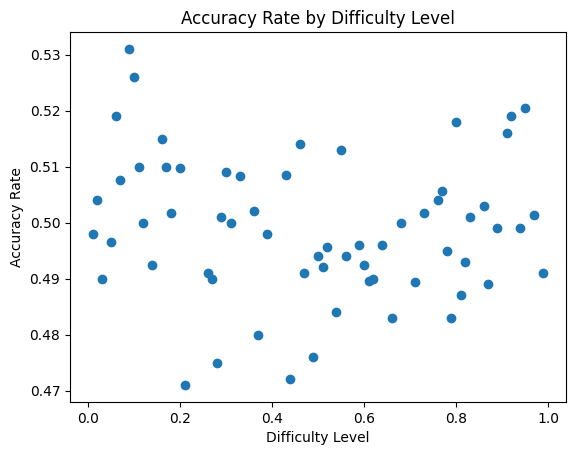

Correlation between difficulty level and performance: -0.00


In [9]:

# Plot accuracy rates against difficulty levels
difficulty_performance = df
difficulty_performance['correct'] = df['is_correct'].astype(int)
avg_performance_by_difficulty = difficulty_performance.groupby('difficulty_level')['correct'].mean()

plt.scatter(avg_performance_by_difficulty.index, avg_performance_by_difficulty.values)
plt.xlabel('Difficulty Level')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rate by Difficulty Level')
plt.show()

# Correlation between difficulty and performance
correlation = difficulty_performance['difficulty_level'].corr(difficulty_performance['correct'])
print(f"Correlation between difficulty level and performance: {correlation:.2f}")

category
Arabic     50.074074
History    49.765217
Math       50.110714
Science    49.936364
Name: is_correct, dtype: float64


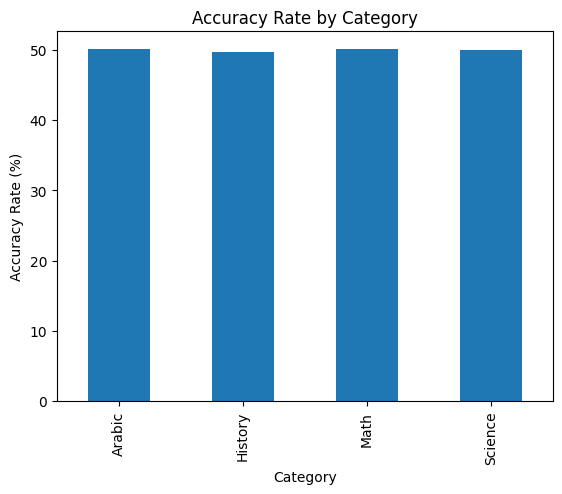

In [10]:
# Compare performance across different categories
category_performance = df.groupby('category')['is_correct'].mean() * 100
print(category_performance)

# Plot category performance
category_performance.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Accuracy Rate (%)')
plt.title('Accuracy Rate by Category')
plt.show()


In [11]:
# Track individual student performance over different categories
student_performance_by_category = df.pivot_table(index='student_id', columns='category', values='is_correct', aggfunc='mean') * 100
student_performance_by_category.head()

category,Arabic,History,Math,Science
student_id,,,,
0,40.740741,34.782609,25.000000,36.363636
1,40.740741,26.086957,39.285714,59.090909
2,59.259259,56.521739,57.142857,68.181818
3,55.555556,52.173913,57.142857,54.545455
4,55.555556,52.173913,53.571429,54.545455


In [12]:
# Distribution of answers
answer_distribution = df['answer'].value_counts()
print(answer_distribution)

# Common incorrect answers
incorrect_answers = df[df['is_correct'] == False]['answer'].value_counts()
print(incorrect_answers)

answer
D    28028
C    25545
A    23670
B    22757
Name: count, dtype: int64
answer
B    13749
A    13131
C    12096
D    11041
Name: count, dtype: int64


category
Arabic     0.474815
History    0.406522
Math       0.535357
Science    0.448636
Name: difficulty_level, dtype: float64


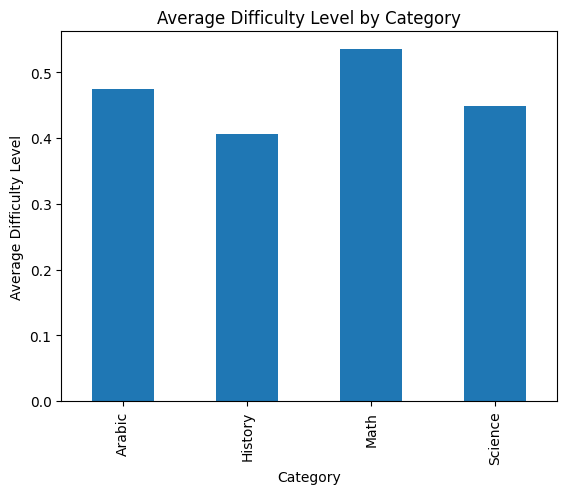

In [13]:
# Average difficulty levels of questions across different categories
avg_difficulty_by_category = df.groupby('category')['difficulty_level'].mean()
print(avg_difficulty_by_category)

# Plot average difficulty by category
avg_difficulty_by_category.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Average Difficulty Level')
plt.title('Average Difficulty Level by Category')
plt.show()

In [14]:
# Characteristics of correctly vs. incorrectly answered questions
correct_vs_incorrect = df.groupby('is_correct')['difficulty_level'].describe()
correct_vs_incorrect

,count,mean,std,min,25%,50%,75%,max
is_correct,,,,,,,,
False,50017.0,0.471017,0.295026,0.01,0.20,0.47,0.73,0.99
True,49983.0,0.469582,0.296857,0.01,0.18,0.46,0.73,0.99


In [15]:
categories = df['category'].unique()
categories

array(['History', 'Arabic', 'Math', 'Science'], dtype=object)

In [17]:
questions_df = pd.read_csv(r'questions.csv')
questions_df

,question_id,difficulty_level,category,correct_answer
0,0,0.37,History,A
1,1,0.95,Arabic,A
2,2,0.73,History,C
3,3,0.60,Math,B
4,4,0.16,Arabic,B
...,...,...,...,...
95,95,0.49,Arabic,D
96,96,0.52,Science,D
97,97,0.43,History,B
98,98,0.03,Math,D


In [21]:
# Create a matrix representation of the data with 1 for incorrect answers and 0 for correct answers
matrix = df.pivot(index='student_id', columns='question_id', values='is_correct').astype(int)
matrix = 1 - matrix  # 1 for incorrect answers, 0 for correct answers

# Calculate the conditional probabilities for pairs of questions in the same category
conditional_probs = []

for category in categories:
    questions_in_category = questions_df[questions_df['category'] == category]['question_id']
    question_pairs = list(combinations(questions_in_category, 2))
    
    for q1, q2 in question_pairs:
        # Calculate P(Wrong on q2 given that Wrong on q1)
        both_wrong = matrix[(matrix[q1] == 1) & (matrix[q2] == 1)].shape[0]
        wrong_q1 = matrix[matrix[q1] == 1].shape[0]
        
        if wrong_q1 > 0:
            conditional_prob = both_wrong / wrong_q1
            conditional_probs.append((q1, float(questions_df[questions_df["question_id"]==q1]["difficulty_level"]),
                                      q2, float(questions_df[questions_df["question_id"]==q2]["difficulty_level"]),
                                      category, conditional_prob))

# Convert to DataFrame 
conditional_probs_df1 = pd.DataFrame(conditional_probs, columns=['Question1', 'Question1_difficulty', 'Question2', 'Question2_difficulty', 'Category', 'Conditional_Probability'])

# Display the top 10 
conditional_probs_df1.sort_values(by='Conditional_Probability', ascending=False).head(10)

C:\Users\sbedo\AppData\Local\Temp\ipykernel_18036\101744407.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  conditional_probs.append((q1, float(questions_df[questions_df["question_id"]==q1]["difficulty_level"]),
C:\Users\sbedo\AppData\Local\Temp\ipykernel_18036\101744407.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q2, float(questions_df[questions_df["question_id"]==q2]["difficulty_level"]),


,Question1,Question1_difficulty,Question2,Question2_difficulty,Category,Conditional_Probability
994,8,0.60,65,0.54,Science,0.567829
943,63,0.36,90,0.12,Math,0.561616
685,12,0.83,28,0.59,Math,0.558763
117,19,0.29,20,0.61,History,0.557730
223,56,0.09,91,0.71,History,0.556503
581,72,0.01,95,0.49,Arabic,0.553785
596,80,0.86,95,0.49,Arabic,0.551308
951,74,0.71,90,0.12,Math,0.548780
84,13,0.21,20,0.61,History,0.548204
1191,70,0.77,96,0.52,Science,0.547619



Average Conditional Probability by Category:
  Category  Conditional_Probability
0   Arabic                 0.500725
1  History                 0.498712
2     Math                 0.499675
3  Science                 0.501860


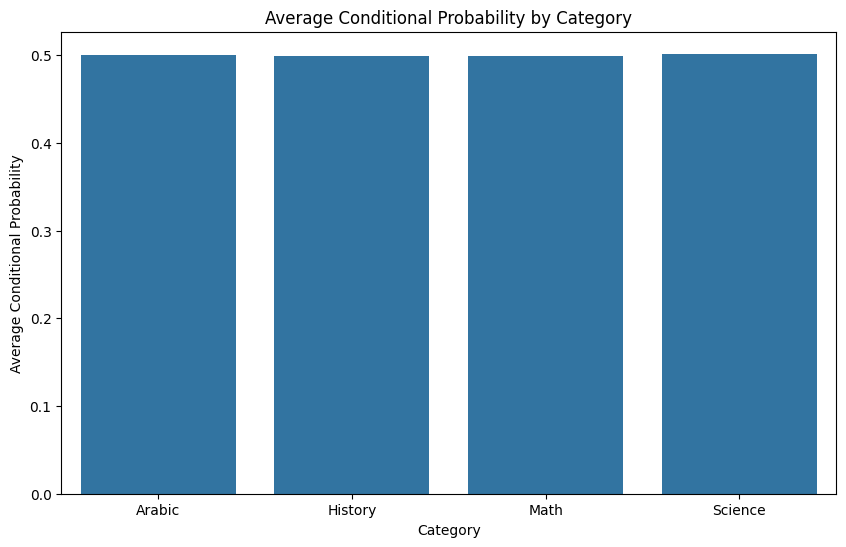

In [89]:
# Category Analysis
category_analysis = conditional_probs_df1.groupby('Category')['Conditional_Probability'].mean().reset_index()
print("\nAverage Conditional Probability by Category:")
print(category_analysis)

# Plot Average Conditional Probability by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Conditional_Probability', data=category_analysis)
plt.title('Average Conditional Probability by Category')
plt.xlabel('Category')
plt.ylabel('Average Conditional Probability')
plt.show()




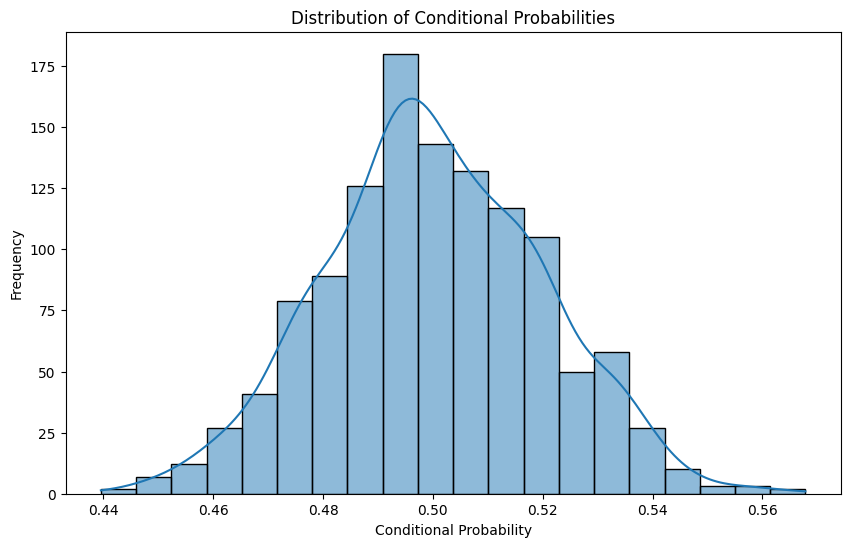

In [90]:
# Difficulty Level Analysis for Top 10
top_10 = conditional_probs_df1.sort_values(by='Conditional_Probability', ascending=False).head(10)
top_10_questions = top_10[['Question1', 'Question2']].values.flatten()
difficulty_levels = questions_df[questions_df['question_id'].isin(top_10_questions)][['question_id', 'difficulty_level']].drop_duplicates()


# Distribution of Conditional Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(conditional_probs_df1['Conditional_Probability'], bins=20, kde=True)
plt.title('Distribution of Conditional Probabilities')
plt.xlabel('Conditional Probability')
plt.ylabel('Frequency')
plt.show()

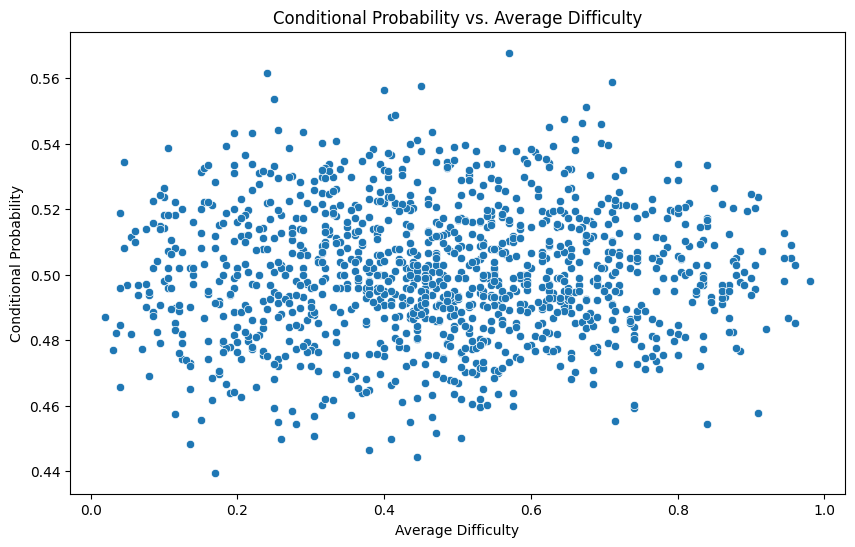

In [91]:
# 5. Conditional Probability by Difficulty Level
# Extract difficulty levels for the questions in conditional_probs_df
question_difficulties = questions_df.set_index('question_id')['difficulty_level']
conditional_probs_df1['Difficulty_Q1'] = conditional_probs_df1['Question1'].map(question_difficulties)
conditional_probs_df1['Difficulty_Q2'] = conditional_probs_df1['Question2'].map(question_difficulties)


# Average difficulty of the two questions
conditional_probs_df1['Average_Difficulty'] = conditional_probs_df1[['Difficulty_Q1', 'Difficulty_Q2']].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Difficulty', y='Conditional_Probability', data=conditional_probs_df1)
plt.title('Conditional Probability vs. Average Difficulty')
plt.xlabel('Average Difficulty')
plt.ylabel('Conditional Probability')
plt.show()




Correlation Matrix:
                         Conditional_Probability  Difficulty_Q1  Difficulty_Q2
Conditional_Probability                 1.000000      -0.010417       0.040387
Difficulty_Q1                          -0.010417       1.000000      -0.014256
Difficulty_Q2                           0.040387      -0.014256       1.000000


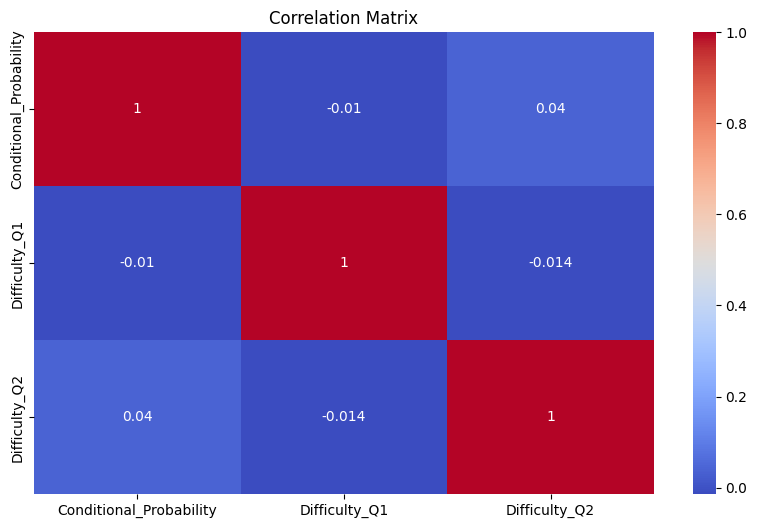

In [93]:
# 6. Correlation Matrix
correlation_matrix1 = conditional_probs_df1[['Conditional_Probability', 'Difficulty_Q1', 'Difficulty_Q2']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix1)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



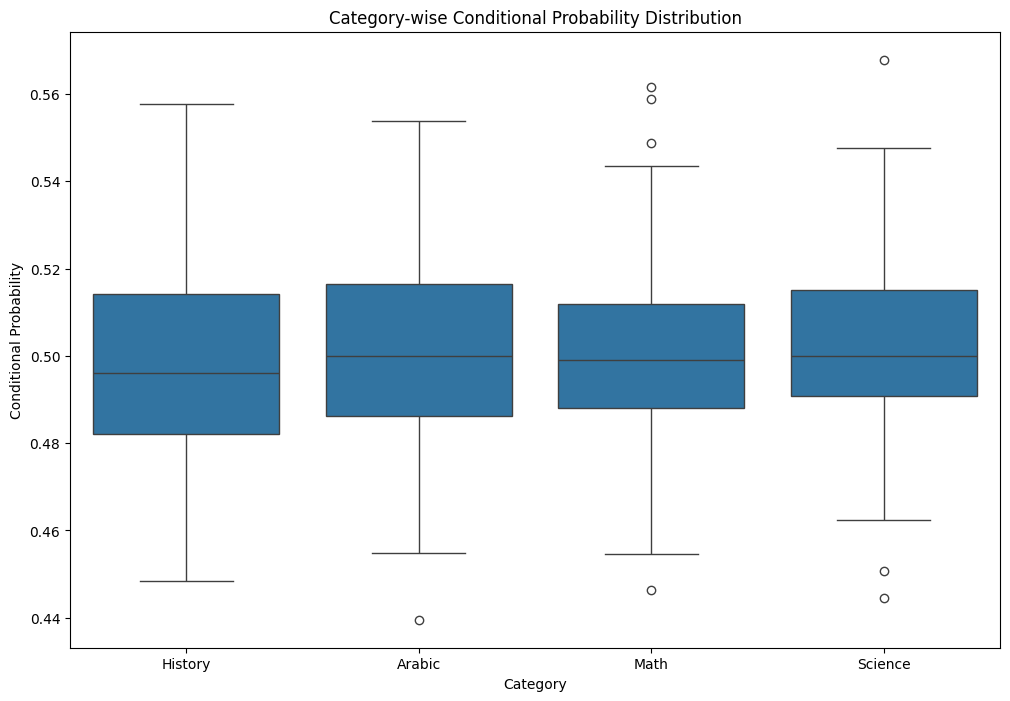

In [94]:
# 7. Category-wise Conditional Probability Distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Conditional_Probability', data=conditional_probs_df1)
plt.title('Category-wise Conditional Probability Distribution')
plt.xlabel('Category')
plt.ylabel('Conditional Probability')
plt.show()

C:\Users\sbedo\AppData\Local\Temp\ipykernel_18036\4220612513.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  difficulty_range_analysis1 = conditional_probs_df1.groupby('Difficulty_Range')['Conditional_Probability'].mean().reset_index()


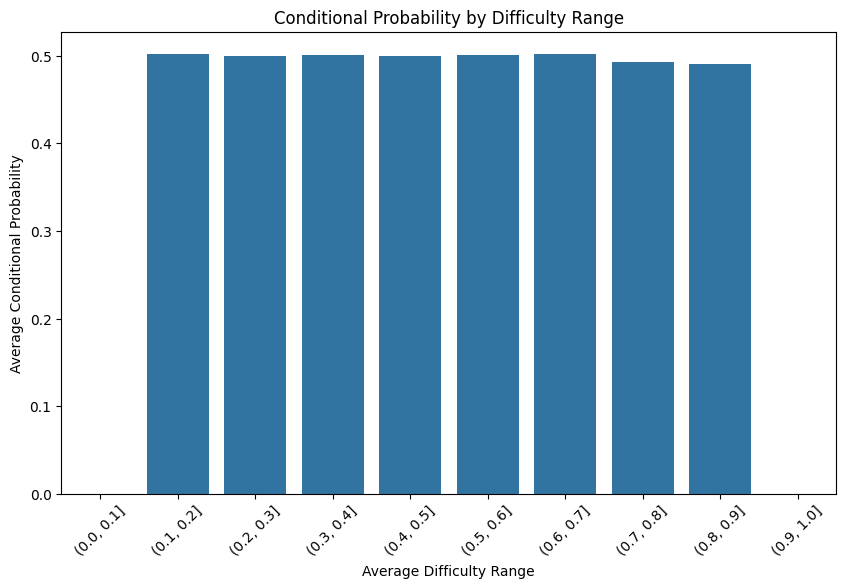

In [95]:
# 8. Conditional Probability Trend by Difficulty Level Range
# Define difficulty level ranges
bins = np.linspace(0, 1, 11)  # Create 10 bins from 0 to 1
conditional_probs_df1['Difficulty_Range'] = pd.cut(conditional_probs_df3['Average_Difficulty'], bins)

# Calculate mean conditional probability for each difficulty range
difficulty_range_analysis1 = conditional_probs_df1.groupby('Difficulty_Range')['Conditional_Probability'].mean().reset_index()

# Plot Conditional Probability by Difficulty Range
plt.figure(figsize=(10, 6))
sns.barplot(x='Difficulty_Range', y='Conditional_Probability', data=difficulty_range_analysis1)
plt.title('Conditional Probability by Difficulty Range')
plt.xlabel('Average Difficulty Range')
plt.ylabel('Average Conditional Probability')
plt.xticks(rotation=45)
plt.show()


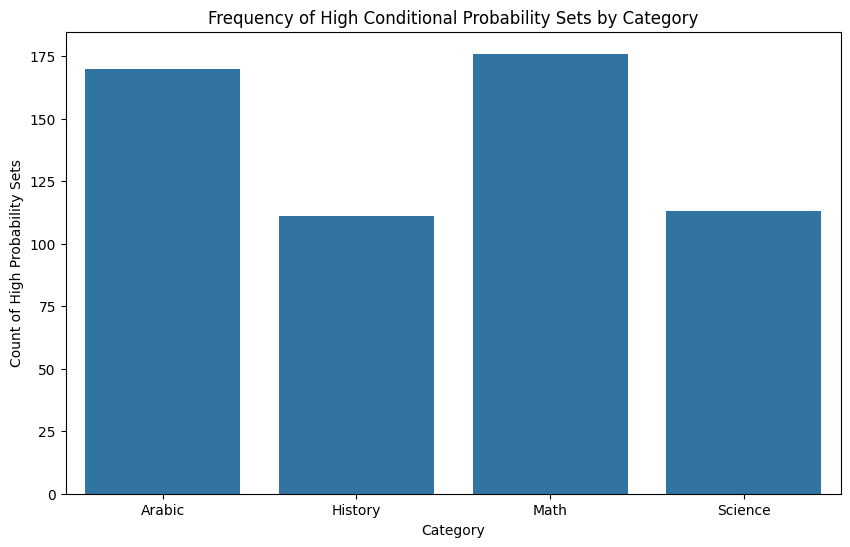

In [97]:
# 9. Frequency of High Conditional Probability Sets
# Define a threshold for high conditional probability
high_prob_threshold = 0.5

# Count the number of high probability sets in each category
high_prob_freq1 = conditional_probs_df1[conditional_probs_df1['Conditional_Probability'] > high_prob_threshold].groupby('Category').size().reset_index(name='High_Prob_Count')

# Plot frequency of high probability sets by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='High_Prob_Count', data=high_prob_freq1)
plt.title('Frequency of High Conditional Probability Sets by Category')
plt.xlabel('Category')
plt.ylabel('Count of High Probability Sets')
plt.show()

In [26]:
# Create a matrix representation of the data with 1 for incorrect answers and 0 for correct answers
matrix = df.pivot(index='student_id', columns='question_id', values='is_correct').astype(int)
matrix = 1 - matrix  # 1 for incorrect answers, 0 for correct answers

# Calculate the conditional probabilities for triples of questions in the same category
conditional_probs = []

for category in questions_df['category'].unique():
    questions_in_category = questions_df[questions_df['category'] == category]['question_id']
    question_triples = list(combinations(questions_in_category, 3))
    
    for q1, q2, q3 in question_triples:
        # Calculate P(Wrong on q3 given that Wrong on q1 and q2)
        all_three_wrong = matrix[(matrix[q1] == 1) & (matrix[q2] == 1) & (matrix[q3] == 1)].shape[0]
        both_wrong = matrix[(matrix[q1] == 1) & (matrix[q2] == 1)].shape[0]
        
        if both_wrong > 0:
            conditional_prob = all_three_wrong / both_wrong
            conditional_probs.append((q1, float(questions_df[questions_df["question_id"]==q1]["difficulty_level"]),
                                      q2, float(questions_df[questions_df["question_id"]==q2]["difficulty_level"]),
                                      q3, float(questions_df[questions_df["question_id"]==q3]["difficulty_level"]),
                                      category, conditional_prob))

# Convert to DataFrame 
conditional_probs_df2 = pd.DataFrame(conditional_probs, columns=['Question1', 'Question1_difficulty',
                                                                 'Question2', 'Question2_difficulty',
                                                                 'Question3', 'Question3_difficulty',
                                                                 'Category', 'Conditional_Probability'])

# Display the top 10 
conditional_probs_df2.sort_values(by='Conditional_Probability', ascending=False).head(10)

C:\Users\sbedo\AppData\Local\Temp\ipykernel_18036\1323088158.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  conditional_probs.append((q1, float(questions_df[questions_df["question_id"]==q1]["difficulty_level"]),
C:\Users\sbedo\AppData\Local\Temp\ipykernel_18036\1323088158.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q2, float(questions_df[questions_df["question_id"]==q2]["difficulty_level"]),
C:\Users\sbedo\AppData\Local\Temp\ipykernel_18036\1323088158.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q3, float(questions_df[questions_df["question_id"]==q3]["difficulty_level"]),


,Question1,Question1_difficulty,Question2,Question2_difficulty,Question3,Question3_difficulty,Category,Conditional_Probability
6017,15,0.18,29,0.05,54,0.60,Math,0.607004
3729,32,0.07,33,0.95,39,0.44,Arabic,0.606061
3198,18,0.43,32,0.07,39,0.44,Arabic,0.604255
5635,9,0.71,63,0.36,98,0.03,Math,0.604167
6972,29,0.05,74,0.71,90,0.12,Math,0.600000
8160,8,0.60,70,0.77,96,0.52,Science,0.596708
5633,9,0.71,63,0.36,90,0.12,Math,0.595833
1576,44,0.26,56,0.09,91,0.71,History,0.594142
3000,16,0.30,32,0.07,89,0.47,Arabic,0.593074
2012,1,0.95,42,0.03,75,0.73,Arabic,0.591093



Average Conditional Probability by Category:
  Category  Conditional_Probability
0   Arabic                 0.500942
1  History                 0.497140
2     Math                 0.500825
3  Science                 0.502008


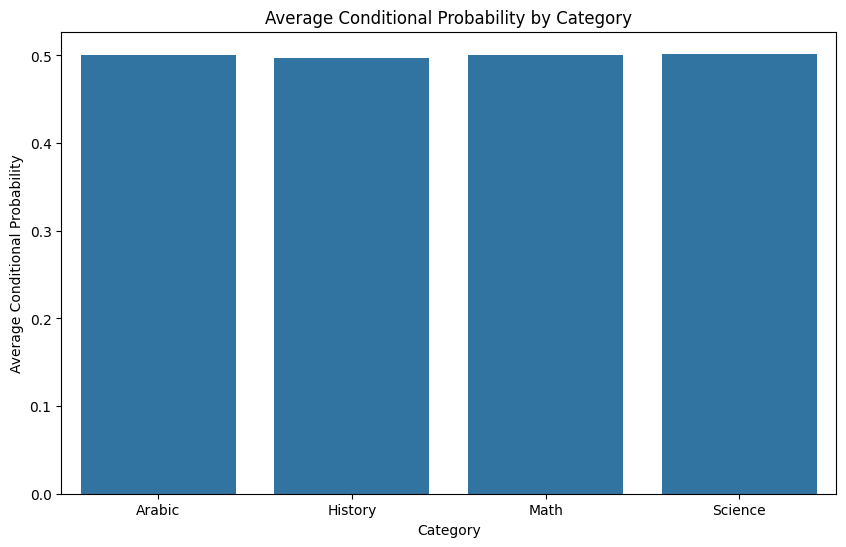

In [85]:
# Category Analysis
category_analysis = conditional_probs_df2.groupby('Category')['Conditional_Probability'].mean().reset_index()
print("\nAverage Conditional Probability by Category:")
print(category_analysis)

# Plot Average Conditional Probability by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Conditional_Probability', data=category_analysis)
plt.title('Average Conditional Probability by Category')
plt.xlabel('Category')
plt.ylabel('Average Conditional Probability')
plt.show()

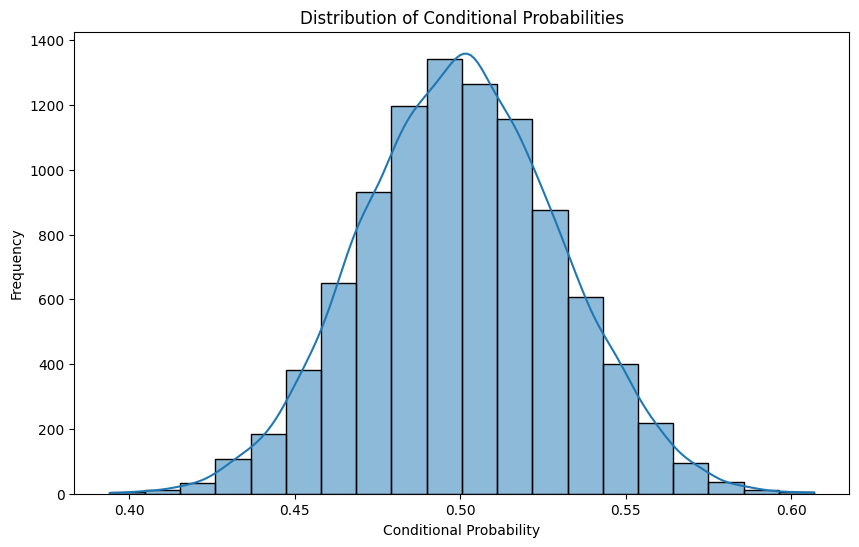

In [87]:
# Difficulty Level Analysis for Top 10
top_10 = conditional_probs_df2.sort_values(by='Conditional_Probability', ascending=False).head(10)

top_10_questions = top_10[['Question1', 'Question2', 'Question3']].values.flatten()
difficulty_levels = questions_df[questions_df['question_id'].isin(top_10_questions)][['question_id', 'difficulty_level']].drop_duplicates()
# Distribution of Conditional Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(conditional_probs_df2['Conditional_Probability'], bins=20, kde=True)
plt.title('Distribution of Conditional Probabilities')
plt.xlabel('Conditional Probability')
plt.ylabel('Frequency')
plt.show()


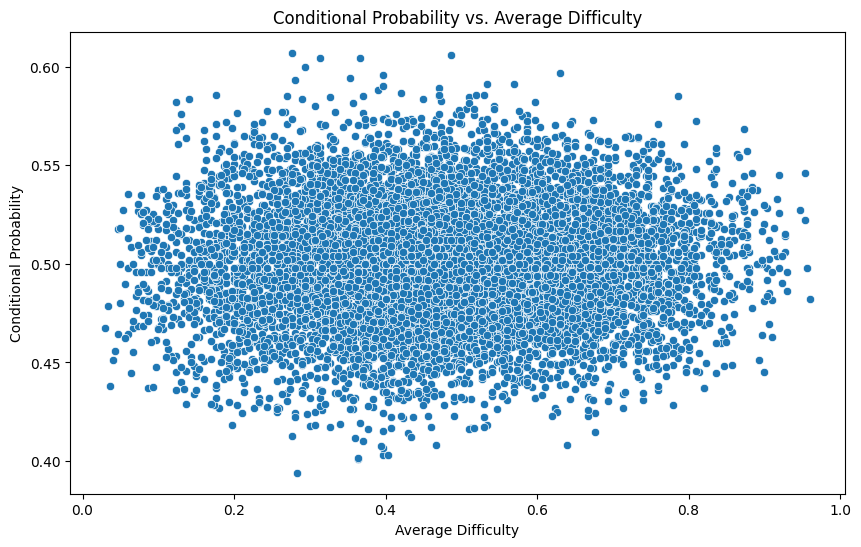

In [79]:
# 5. Conditional Probability by Difficulty Level
# Extract difficulty levels for the questions in conditional_probs_df
question_difficulties = questions_df.set_index('question_id')['difficulty_level']
conditional_probs_df2['Difficulty_Q1'] = conditional_probs_df2['Question1'].map(question_difficulties)
conditional_probs_df2['Difficulty_Q2'] = conditional_probs_df2['Question2'].map(question_difficulties)
conditional_probs_df2['Difficulty_Q3'] = conditional_probs_df2['Question3'].map(question_difficulties)

# Average difficulty of the three questions
conditional_probs_df2['Average_Difficulty'] = conditional_probs_df2[['Difficulty_Q1', 'Difficulty_Q2', 'Difficulty_Q3']].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Difficulty', y='Conditional_Probability', data=conditional_probs_df2)
plt.title('Conditional Probability vs. Average Difficulty')
plt.xlabel('Average Difficulty')
plt.ylabel('Conditional Probability')
plt.show()



Correlation Matrix:
                         Conditional_Probability  Difficulty_Q1  \
Conditional_Probability                 1.000000       0.015982   
Difficulty_Q1                           0.015982       1.000000   
Difficulty_Q2                          -0.007506      -0.029378   
Difficulty_Q3                           0.041608       0.005568   

                         Difficulty_Q2  Difficulty_Q3  
Conditional_Probability      -0.007506       0.041608  
Difficulty_Q1                -0.029378       0.005568  
Difficulty_Q2                 1.000000      -0.018453  
Difficulty_Q3                -0.018453       1.000000  


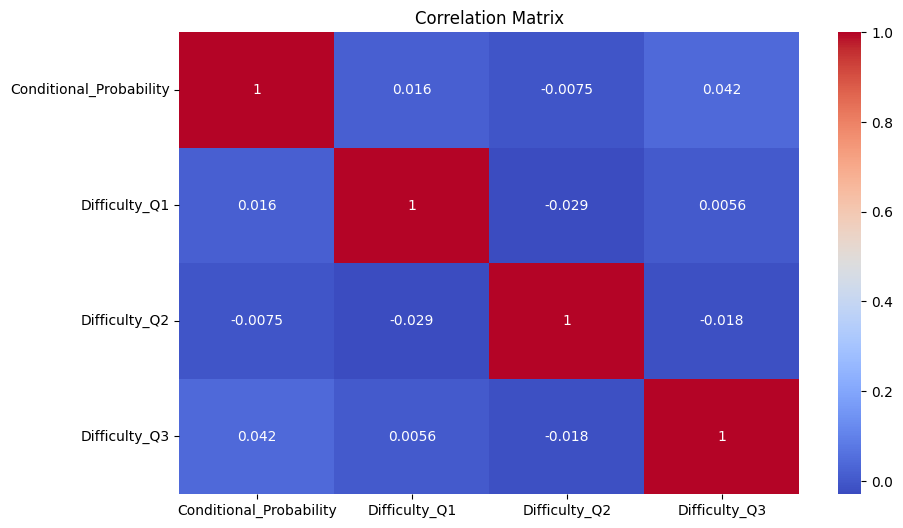

In [80]:
# 6. Correlation Matrix
correlation_matrix2 = conditional_probs_df2[['Conditional_Probability', 'Difficulty_Q1', 'Difficulty_Q2', 'Difficulty_Q3']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix2)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

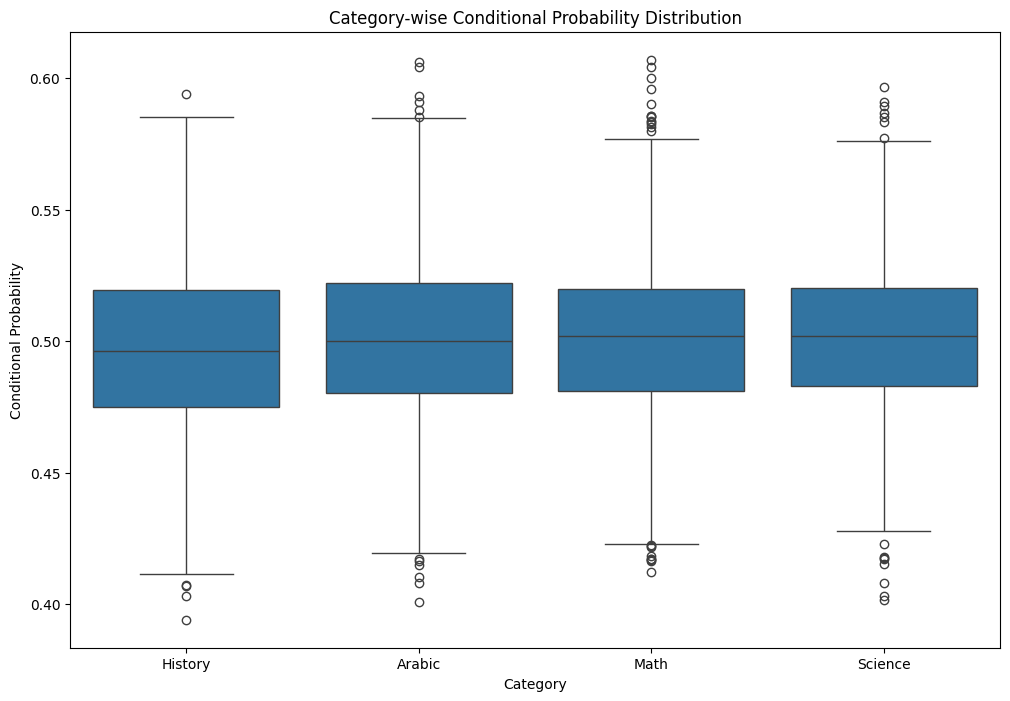

In [81]:
# 7. Category-wise Conditional Probability Distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Conditional_Probability', data=conditional_probs_df2)
plt.title('Category-wise Conditional Probability Distribution')
plt.xlabel('Category')
plt.ylabel('Conditional Probability')
plt.show()


C:\Users\sbedo\AppData\Local\Temp\ipykernel_18036\2454369587.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  difficulty_range_analysis2 = conditional_probs_df2.groupby('Difficulty_Range')['Conditional_Probability'].mean().reset_index()


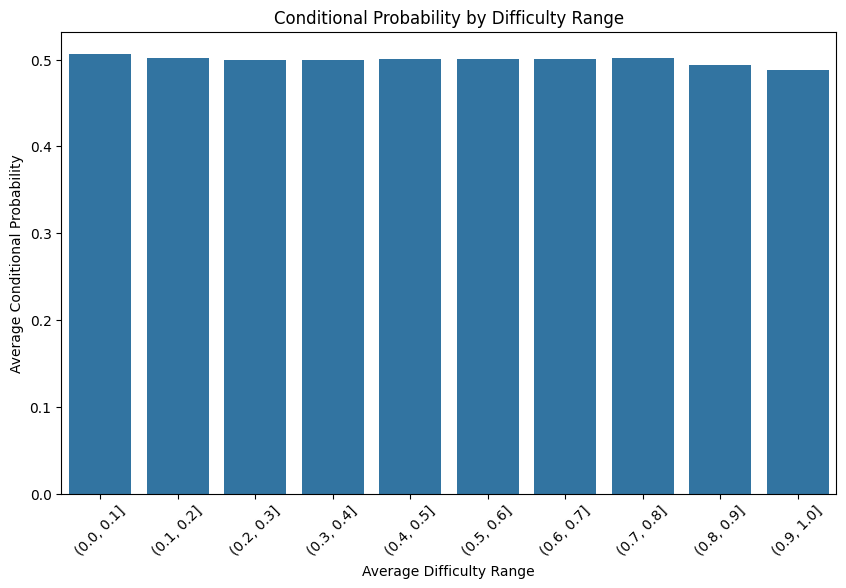

In [82]:
# 8. Conditional Probability Trend by Difficulty Level Range
# Define difficulty level ranges
bins = np.linspace(0, 1, 11)  # Create 10 bins from 0 to 1
conditional_probs_df2['Difficulty_Range'] = pd.cut(conditional_probs_df3['Average_Difficulty'], bins)

# Calculate mean conditional probability for each difficulty range
difficulty_range_analysis2 = conditional_probs_df2.groupby('Difficulty_Range')['Conditional_Probability'].mean().reset_index()

# Plot Conditional Probability by Difficulty Range
plt.figure(figsize=(10, 6))
sns.barplot(x='Difficulty_Range', y='Conditional_Probability', data=difficulty_range_analysis2)
plt.title('Conditional Probability by Difficulty Range')
plt.xlabel('Average Difficulty Range')
plt.ylabel('Average Conditional Probability')
plt.xticks(rotation=45)
plt.show()


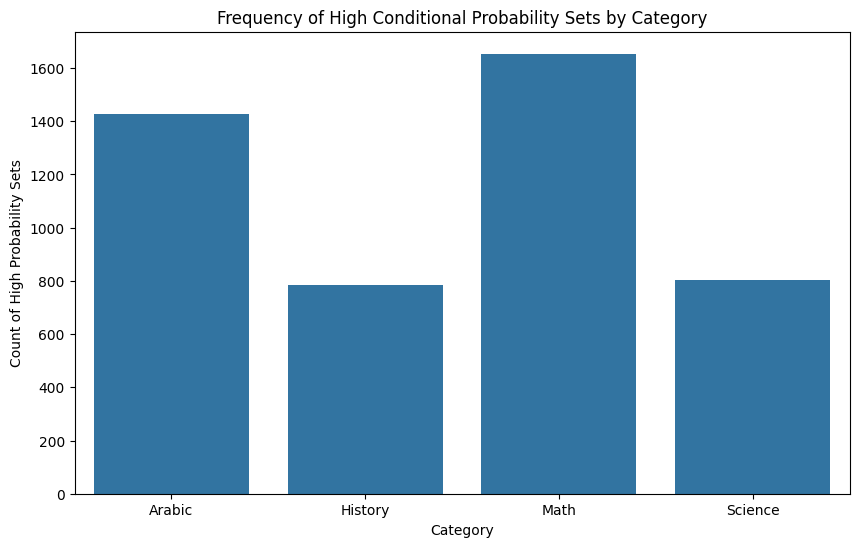

In [84]:
# 9. Frequency of High Conditional Probability Sets
# Define a threshold for high conditional probability
high_prob_threshold = 0.5

# Count the number of high probability sets in each category
high_prob_freq2 = conditional_probs_df2[conditional_probs_df2['Conditional_Probability'] > high_prob_threshold].groupby('Category').size().reset_index(name='High_Prob_Count')

# Plot frequency of high probability sets by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='High_Prob_Count', data=high_prob_freq2)
plt.title('Frequency of High Conditional Probability Sets by Category')
plt.xlabel('Category')
plt.ylabel('Count of High Probability Sets')
plt.show()

In [29]:
# Create a matrix representation of the data with 1 for incorrect answers and 0 for correct answers
matrix = df.pivot(index='student_id', columns='question_id', values='is_correct').astype(int)
matrix = 1 - matrix  # 1 for incorrect answers, 0 for correct answers

# Calculate the conditional probabilities for quadruples of questions in the same category
conditional_probs = []

for category in questions_df['category'].unique():
    questions_in_category = questions_df[questions_df['category'] == category]['question_id']
    question_quadruples = list(combinations(questions_in_category, 4))
    
    for q1, q2, q3, q4 in question_quadruples:
        # Calculate P(Wrong on q4 given that Wrong on q1, q2, and q3)
        all_four_wrong = matrix[(matrix[q1] == 1) & (matrix[q2] == 1) & (matrix[q3] == 1) & (matrix[q4] == 1)].shape[0]
        first_three_wrong = matrix[(matrix[q1] == 1) & (matrix[q2] == 1) & (matrix[q3] == 1)].shape[0]
        
        if first_three_wrong > 0:
            conditional_prob = all_four_wrong / first_three_wrong
            conditional_probs.append((q1, float(questions_df[questions_df["question_id"]==q1]["difficulty_level"]),
                                      q2, float(questions_df[questions_df["question_id"]==q2]["difficulty_level"]),
                                      q3, float(questions_df[questions_df["question_id"]==q3]["difficulty_level"]),
                                      q4, float(questions_df[questions_df["question_id"]==q4]["difficulty_level"]),
                                      category, conditional_prob))

# Convert to DataFrame for easy viewing
conditional_probs_df3 = pd.DataFrame(conditional_probs, columns=['Question1', 'Question1_difficulty',
                                                                 'Question2', 'Question2_difficulty',
                                                                 'Question3', 'Question3_difficulty',
                                                                 'Question4', 'Question4_difficulty',
                                                                 'Category', 'Conditional_Probability'])

# Display the top 10 
conditional_probs_df3.sort_values(by='Conditional_Probability', ascending=False).head(10)

C:\Users\sbedo\AppData\Local\Temp\ipykernel_18036\1644223210.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  conditional_probs.append((q1, float(questions_df[questions_df["question_id"]==q1]["difficulty_level"]),
C:\Users\sbedo\AppData\Local\Temp\ipykernel_18036\1644223210.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q2, float(questions_df[questions_df["question_id"]==q2]["difficulty_level"]),
C:\Users\sbedo\AppData\Local\Temp\ipykernel_18036\1644223210.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q3, float(questions_df[questions_df["question_id"]==q3]["difficulty_level"]),
C:\Users\sbedo\AppData\Local\Temp\ipykernel_18036\1644223210.py:22: FutureWarning: Calling float on a

,Question1,Question1_difficulty,Question2,Question2_difficulty,Question3,Question3_difficulty,Question4,Question4_difficulty,Category,Conditional_Probability
11148,1,0.95,42,0.03,73,0.82,75,0.73,Arabic,0.677966
36890,15,0.18,29,0.05,43,0.91,54,0.60,Math,0.672131
33907,9,0.71,53,0.89,63,0.36,98,0.03,Math,0.669291
25846,52,0.94,71,0.20,80,0.86,95,0.49,Arabic,0.666667
21562,31,0.17,32,0.07,33,0.95,39,0.44,Arabic,0.663551
17768,16,0.30,23,0.37,31,0.17,66,0.14,Arabic,0.661157
1096,0,0.37,21,0.14,38,0.68,91,0.71,History,0.654676
25796,52,0.94,67,0.80,71,0.20,95,0.49,Arabic,0.653226
8165,41,0.50,44,0.26,56,0.09,91,0.71,History,0.652893
12297,4,0.16,18,0.43,34,0.97,72,0.01,Arabic,0.652542



Average Conditional Probability by Category:
  Category  Conditional_Probability
0   Arabic                 0.500542
1  History                 0.496259
2     Math                 0.501777
3  Science                 0.500851


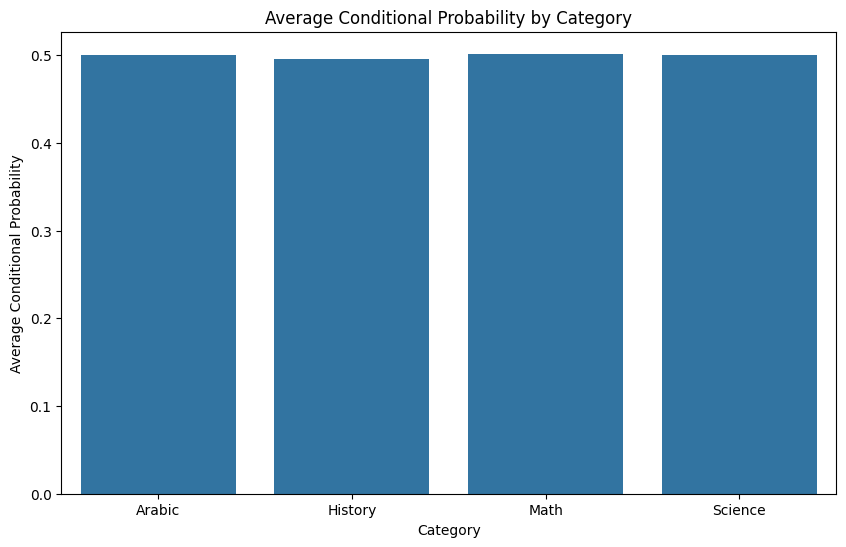

In [56]:
# Category Analysis
category_analysis = conditional_probs_df3.groupby('Category')['Conditional_Probability'].mean().reset_index()
print("\nAverage Conditional Probability by Category:")
print(category_analysis)

# Plot Average Conditional Probability by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Conditional_Probability', data=category_analysis)
plt.title('Average Conditional Probability by Category')
plt.xlabel('Category')
plt.ylabel('Average Conditional Probability')
plt.show()


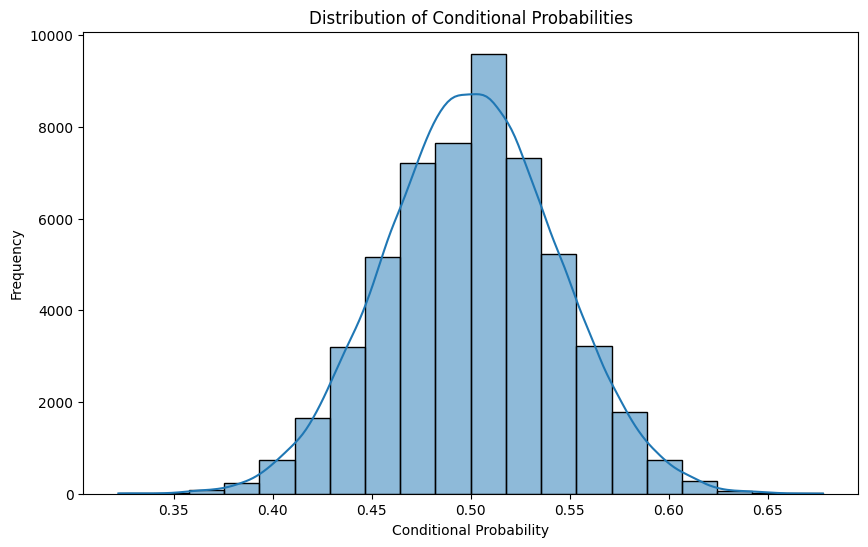

In [88]:
# Difficulty Level Analysis for Top 10
top_10 = conditional_probs_df3.sort_values(by='Conditional_Probability', ascending=False).head(10)
top_10_questions = top_10[['Question1', 'Question2', 'Question3', 'Question4']].values.flatten()
difficulty_levels = questions_df[questions_df['question_id'].isin(top_10_questions)][['question_id', 'difficulty_level']].drop_duplicates()

# Distribution of Conditional Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(conditional_probs_df3['Conditional_Probability'], bins=20, kde=True)
plt.title('Distribution of Conditional Probabilities')
plt.xlabel('Conditional Probability')
plt.ylabel('Frequency')
plt.show()

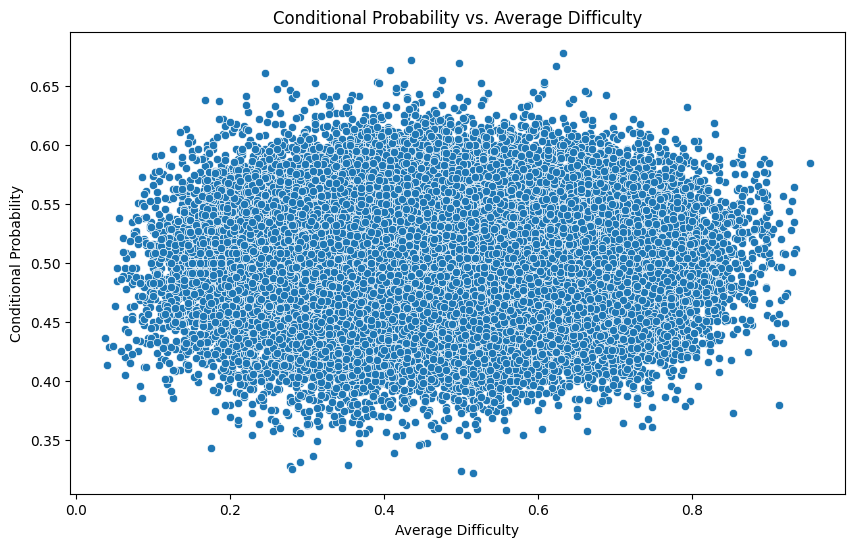

In [58]:
# 5. Conditional Probability by Difficulty Level
# Extract difficulty levels for the questions in conditional_probs_df
question_difficulties = questions_df.set_index('question_id')['difficulty_level']
conditional_probs_df3['Difficulty_Q1'] = conditional_probs_df3['Question1'].map(question_difficulties)
conditional_probs_df3['Difficulty_Q2'] = conditional_probs_df3['Question2'].map(question_difficulties)
conditional_probs_df3['Difficulty_Q3'] = conditional_probs_df3['Question3'].map(question_difficulties)
conditional_probs_df3['Difficulty_Q4'] = conditional_probs_df3['Question4'].map(question_difficulties)

# Average difficulty of the four questions
conditional_probs_df3['Average_Difficulty'] = conditional_probs_df3[['Difficulty_Q1', 'Difficulty_Q2', 'Difficulty_Q3', 'Difficulty_Q4']].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Difficulty', y='Conditional_Probability', data=conditional_probs_df3)
plt.title('Conditional Probability vs. Average Difficulty')
plt.xlabel('Average Difficulty')
plt.ylabel('Conditional Probability')
plt.show()


Correlation Matrix:
                         Conditional_Probability  Difficulty_Q1  \
Conditional_Probability                 1.000000       0.010217   
Difficulty_Q1                           0.010217       1.000000   
Difficulty_Q2                           0.013427      -0.058886   
Difficulty_Q3                          -0.003906       0.010250   
Difficulty_Q4                           0.037633       0.004269   

                         Difficulty_Q2  Difficulty_Q3  Difficulty_Q4  
Conditional_Probability       0.013427      -0.003906       0.037633  
Difficulty_Q1                -0.058886       0.010250       0.004269  
Difficulty_Q2                 1.000000      -0.010435       0.000630  
Difficulty_Q3                -0.010435       1.000000      -0.031582  
Difficulty_Q4                 0.000630      -0.031582       1.000000  


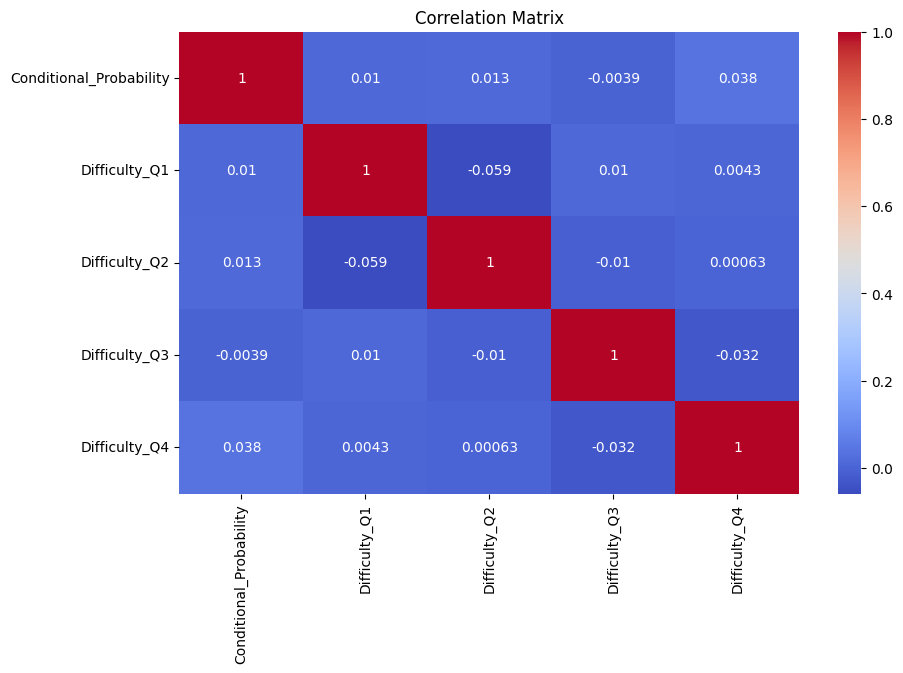

In [61]:
# 6. Correlation Matrix
correlation_matrix3 = conditional_probs_df3[['Conditional_Probability', 'Difficulty_Q1', 'Difficulty_Q2', 'Difficulty_Q3', 'Difficulty_Q4']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix3)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

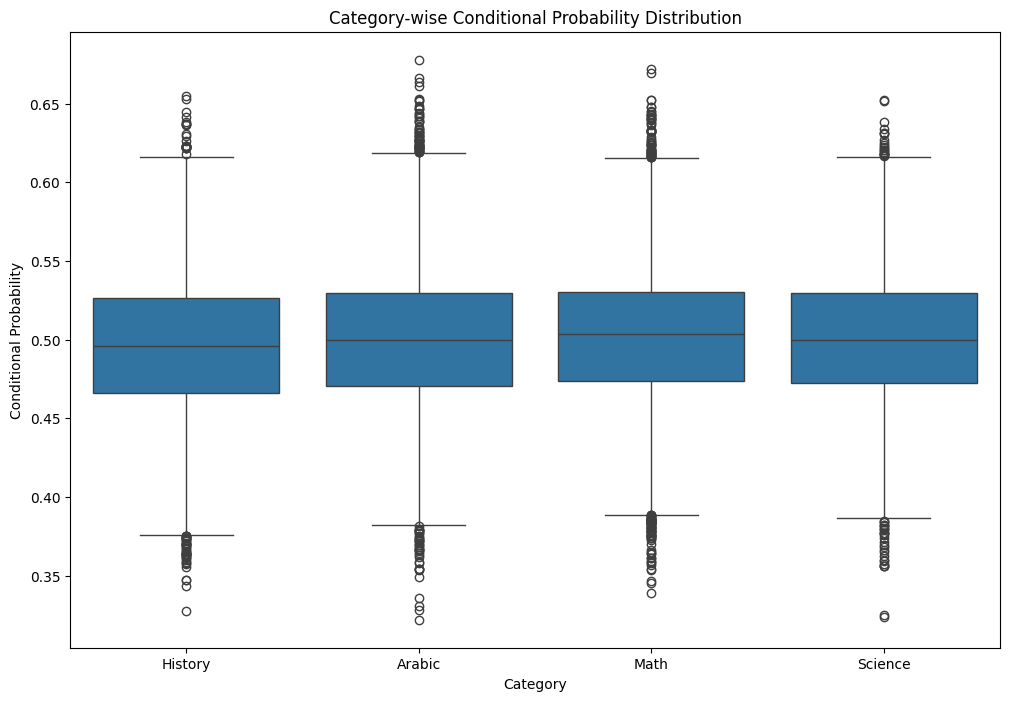

In [62]:
# 7. Category-wise Conditional Probability Distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Conditional_Probability', data=conditional_probs_df3)
plt.title('Category-wise Conditional Probability Distribution')
plt.xlabel('Category')
plt.ylabel('Conditional Probability')
plt.show()

C:\Users\sbedo\AppData\Local\Temp\ipykernel_18036\140442901.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  difficulty_range_analysis = conditional_probs_df3.groupby('Difficulty_Range')['Conditional_Probability'].mean().reset_index()


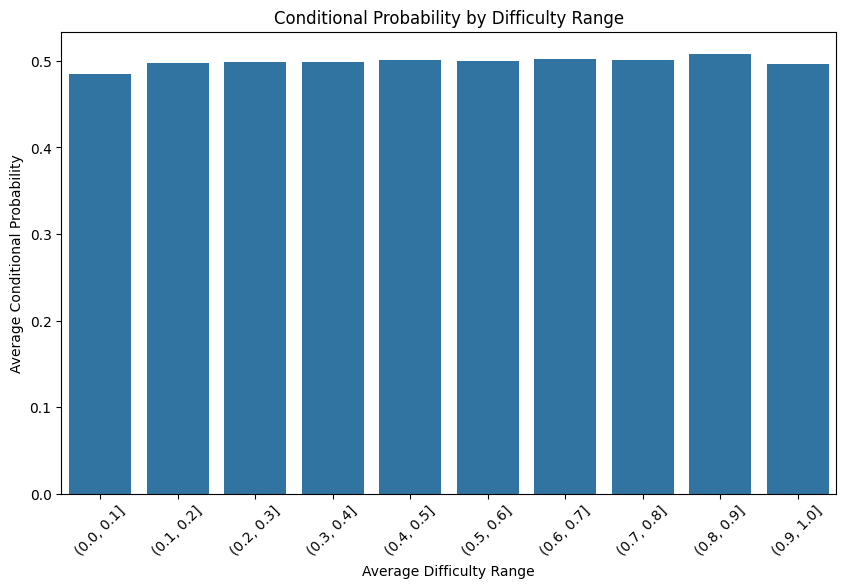

In [53]:

# 8. Conditional Probability Trend by Difficulty Level Range
# Define difficulty level ranges
bins = np.linspace(0, 1, 11)  # Create 10 bins from 0 to 1
conditional_probs_df3['Difficulty_Range'] = pd.cut(conditional_probs_df3['Average_Difficulty'], bins)

# Calculate mean conditional probability for each difficulty range
difficulty_range_analysis = conditional_probs_df3.groupby('Difficulty_Range')['Conditional_Probability'].mean().reset_index()

# Plot Conditional Probability by Difficulty Range
plt.figure(figsize=(10, 6))
sns.barplot(x='Difficulty_Range', y='Conditional_Probability', data=difficulty_range_analysis)
plt.title('Conditional Probability by Difficulty Range')
plt.xlabel('Average Difficulty Range')
plt.ylabel('Average Conditional Probability')
plt.xticks(rotation=45)
plt.show()



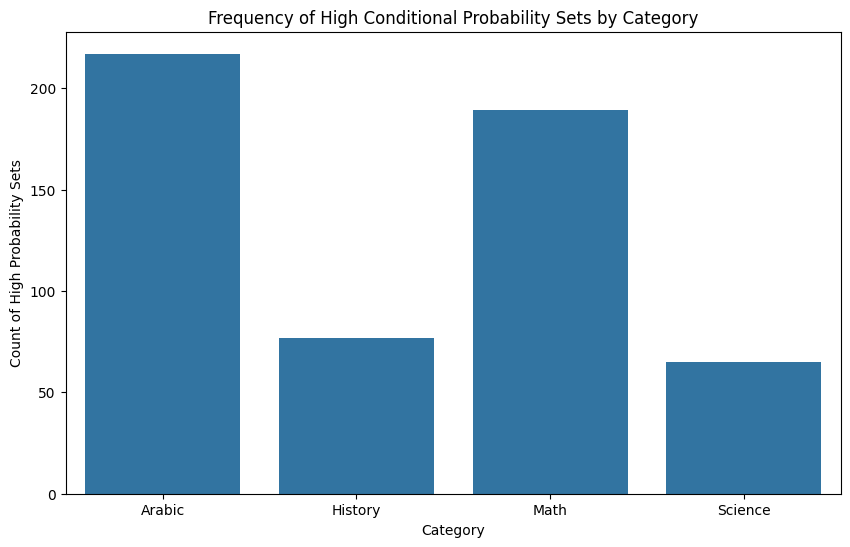

In [54]:
# 9. Frequency of High Conditional Probability Sets
# Define a threshold for high conditional probability
high_prob_threshold = 0.6

# Count the number of high probability sets in each category
high_prob_freq = conditional_probs_df3[conditional_probs_df3['Conditional_Probability'] > high_prob_threshold].groupby('Category').size().reset_index(name='High_Prob_Count')

# Plot frequency of high probability sets by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='High_Prob_Count', data=high_prob_freq)
plt.title('Frequency of High Conditional Probability Sets by Category')
plt.xlabel('Category')
plt.ylabel('Count of High Probability Sets')
plt.show()